
# Micromagnetic standard problem 1

**Author**: Marijan Beg

**Date**: 10 May 2016

## Problem specification

The simulated sample is a thin film cuboid with dimensions:
- length $L_{x} =  2 \,\mu\text{m}$,
- width $L_{y} = 1 \,\mu\text{m}$, and
- thickness $t = 20 \,\text{nm}$.

The material parameters (similar to permalloy) are:

- exchange energy constant $A = 1.3 \times 10^{-11} \,\text{J/m}$,
- magnetisation saturation $M_\text{s} = 8 \times 10^{5} \,\text{A/m}$.

Apart from the symmetric exchange and demagnetisation energies, uniaxial anisotropy energy is also present with

- $K = 0.5 \times 10^{3} \,\text{J/m}^{3}$
- $(1, 0, 0)$ direction.

More details on standard problem 1 specifications can be found in Ref. 1.

## Simulation

In the first step, we define all simulation parameters.

In [1]:
!rm -rf standard_problem1

In [2]:
import numpy as np

Lx = 2e-6  # x dimension of the sample(m)
Ly = 1e-6  # y dimension of the sample (m)
thickness = 20e-9  # sample thickness (m)
dx = dy = dz = 20e-9 # discretisation in x and y directions (m)

# Minimum sample coordinate.
p1 = (0, 0, 0)
# Maximum sample coordinate.
p2 = (Lx, Ly, thickness)
# Discretisation.
cell = (dx, dy, dz)

Ms = 8e5  # saturation magnetisation (A/m)
A = 1.3e-11  # exchange energy constant (J/m)
K = 0.5e3  # uniaxial anisotropy constant (J/m**3)
u = (1, 0, 0)  # uniaxial anisotropy axis

After all required simulation parameters are defined, necessary modules are imported.

In [3]:
import discretisedfield as df
import oommfc as oc

Now, we can create atlas, mesh, and simulation objects.

In [4]:
# Create a mesh object.
mesh = oc.Mesh(p1, p2, cell)

# Create a system object.
system = oc.System(name='standard_problem1')

In the next step, energy terms are added. We add symmetric exchange, demagnetisation, and Zeeman energies to the system's Hamiltonian. At this point, we add a Zeeman energy contribution with zero external magnetic field, but this value will be successivelly changed in the hysteresis loop simulation.

In [5]:
system.mesh = mesh

system.hamiltonian = oc.Exchange(A) + oc.UniaxialAnisotropy(K, u) + oc.Demag()

The system is initialised in the $(10, 1, 0)$ direction [1].

In [6]:
system.m = df.Field(mesh, value=(10, 1, 0), normalisedto=Ms)

Before the hysteresis simulations are carried out, external magnetic field values at which the system should be relaxed must be created.

In [7]:
Hmax = (50e-3/oc.mu0, 0.87275325e-3/oc.mu0, 0)
Hmin = (-50e-3/oc.mu0, -0.87275325e-3/oc.mu0, 0)
n = 2

Finally, the system is relaxed at every external magnetic field value and average magnetisation is computed.

In [8]:
hd = oc.HysteresisDriver()
hd.drive(system, Hmax=Hmax, Hmin=Hmin, n=n)

TypeError: script() got an unexpected keyword argument 'Hmin'

In [25]:
# Empty lists for saving average magnetisation.
mx_average = []
my_average = []
mz_average = []

md = oc.MinDriver()

for H in H_array:
    # Set external magnetic field.
    sim.hamiltonian.zeeman.H = H*Hdirection
    
    # Relax the system.
    md.drive(system)
    
    # Compute the average magnetisation.
    m_average = system.m.average()
    
    # Append average magnetisation components.
    mx_average.append(m_average[0])
    my_average.append(m_average[1])
    mz_average.append(m_average[2])

## Hysteresis loop plot

After obtaining the average magnetisation at different external magnetic field values, hysteresis loop is plotted.

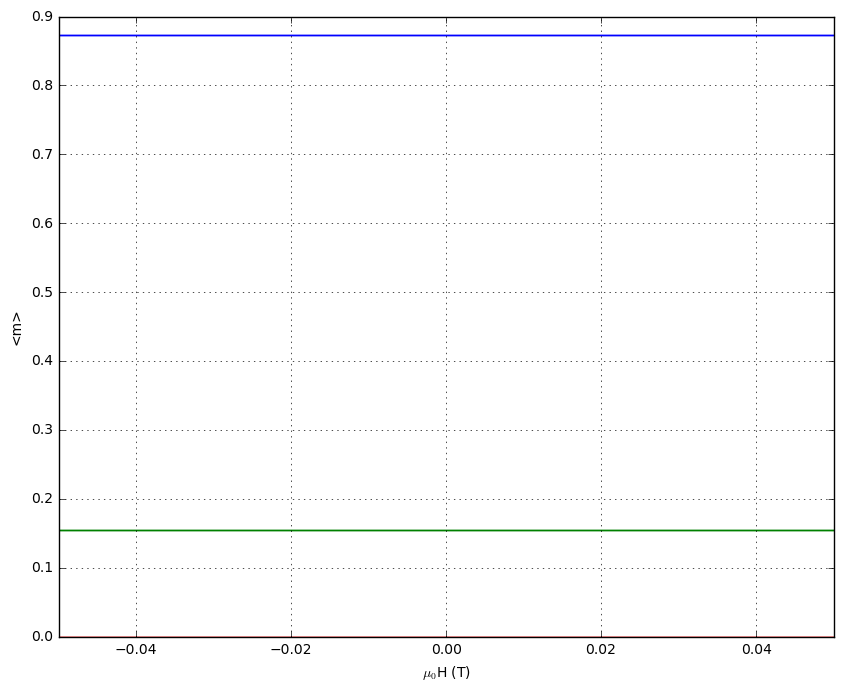

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot(H_array*oc.mu0, mx_average, label='<mx>')
plt.plot(H_array*oc.mu0, my_average, label='<my>')
plt.plot(H_array*oc.mu0, mz_average, label='<mz>')
plt.xlim(-Hmax*oc.mu0, Hmax*oc.mu0)
plt.xlabel(r'$\mu_{0}$H (T)')
plt.ylabel('<m>')
plt.grid()

## References

[1] http://www.ctcms.nist.gov/~rdm/mumag.org.html